In [15]:
#Problem 1 - Iris Dataset
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.impute import SimpleImputer

from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
#Load iris dataset
iris = load_iris()

#Create dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

#Set up data as samples and features
X = iris.data
y = iris.target

#Using the train_test_split function to make a split
#Note: the "test_size = 0.2" indicates the percentage of the data that should be held for testing. In this case, 80/20
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

#For self, total = 150. X_train = 120/150 = 0.8 & X_test = 30/150 = 0.2
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


[Text(167.4, 163.07999999999998, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [38, 41, 41]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.5\nsamples = 82\nvalue = [0, 41, 41]')]

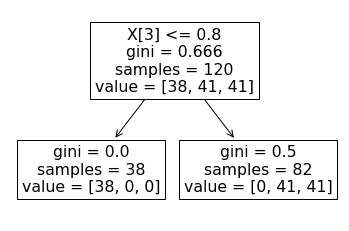

In [51]:
#Defining and fitting a decision tree instance
#DecisionTreeClassifier parameters are: min of 2 instances in leaves, no splits of subsets below 5, and a maximal tree depth
#from 1 to 5
classifier = tree.DecisionTreeClassifier(max_depth=1, min_samples_split=5, min_samples_leaf=2)
classifier = classifier.fit(X_train, y_train)

#Setting up expectations and prediction
expected = y_test
predicted = classifier.predict(X_test)

#Show a visual representation of the tree
tree.plot_tree(classifier)

In [52]:
#Look at main classification metrics for tree of depth 1
print("Expected: ", expected)
print("Predicted:", predicted)
print(metrics.classification_report(expected, predicted))

Expected:  [0 0 2 1 0 2 2 0 2 1 0 0 1 2 1 0 1 0 0 1 2 0 1 2 0 1 1 2 2 0]
Predicted: [0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.50      1.00      0.67         9
           2       0.00      0.00      0.00         9

    accuracy                           0.70        30
   macro avg       0.50      0.67      0.56        30
weighted avg       0.55      0.70      0.60        30



/Users/shiqiliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[Text(133.92000000000002, 181.2, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [38, 41, 41]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 1.75\ngini = 0.5\nsamples = 82\nvalue = [0, 41, 41]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.165\nsamples = 44\nvalue = [0, 40, 4]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.051\nsamples = 38\nvalue = [0, 1, 37]')]

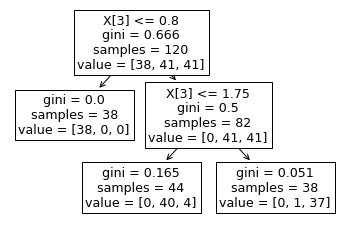

In [53]:
#For tree depth of 2
classifier = tree.DecisionTreeClassifier(max_depth=2, min_samples_split=5, min_samples_leaf=2)
classifier = classifier.fit(X_train, y_train)

expected = y_test
predicted = classifier.predict(X_test)

tree.plot_tree(classifier)

In [54]:
#Look at main classification metrics for tree of depth 2
print("Expected: ", expected)
print("Predicted:", predicted)
print(metrics.classification_report(expected, predicted))

Expected:  [0 0 2 1 0 2 2 0 2 1 0 0 1 2 1 0 1 0 0 1 2 0 1 2 0 1 1 2 2 0]
Predicted: [0 0 2 1 0 2 2 0 2 1 0 0 1 1 1 0 1 0 0 1 2 0 1 2 0 1 1 2 2 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      1.00      0.95         9
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



[Text(125.55000000000001, 190.26, 'X[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [38, 41, 41]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.75\ngini = 0.5\nsamples = 82\nvalue = [0, 41, 41]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\ngini = 0.165\nsamples = 44\nvalue = [0, 40, 4]'),
 Text(41.85, 27.180000000000007, 'gini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(209.25, 27.180000000000007, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]')]

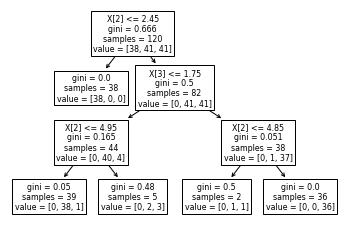

In [55]:
#For tree depth of 3
classifier = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=5, min_samples_leaf=2)
classifier = classifier.fit(X_train, y_train)

expected = y_test
predicted = classifier.predict(X_test)

tree.plot_tree(classifier)

In [56]:
#Look at main classification metrics for tree of depth 3
print("Expected: ", expected)
print("Predicted:", predicted)
print(metrics.classification_report(expected, predicted))


Expected:  [0 0 2 1 0 2 2 0 2 1 0 0 1 2 1 0 1 0 0 1 2 0 1 2 0 1 1 2 2 0]
Predicted: [0 0 2 1 0 2 2 0 2 1 0 0 1 2 1 0 1 0 0 1 2 0 1 2 0 1 1 2 1 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      1.00      0.95         9
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



[Text(167.4, 195.696, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [38, 41, 41]'),
 Text(136.96363636363637, 152.208, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(197.83636363636364, 152.208, 'X[3] <= 1.75\ngini = 0.5\nsamples = 82\nvalue = [0, 41, 41]'),
 Text(121.74545454545455, 108.72, 'X[2] <= 4.95\ngini = 0.165\nsamples = 44\nvalue = [0, 40, 4]'),
 Text(60.872727272727275, 65.232, 'X[3] <= 1.55\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(30.436363636363637, 21.744, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(91.30909090909091, 21.744, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(182.61818181818182, 65.232, 'X[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(152.1818181818182, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(213.05454545454546, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(273.92727272727274, 108.72, 'X[2] <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(243.49

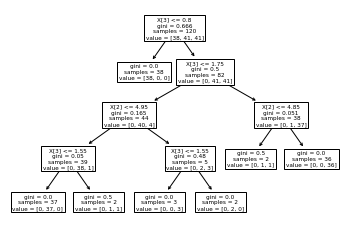

In [57]:
#For tree depth of 4
classifier = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=5, min_samples_leaf=2)
classifier = classifier.fit(X_train, y_train)

expected = y_test
predicted = classifier.predict(X_test)

tree.plot_tree(classifier)

In [58]:
#Look at main classification metrics for tree of depth 4
print("Expected: ", expected)
print("Predicted:", predicted)
print(metrics.classification_report(expected, predicted))

Expected:  [0 0 2 1 0 2 2 0 2 1 0 0 1 2 1 0 1 0 0 1 2 0 1 2 0 1 1 2 2 0]
Predicted: [0 0 2 1 0 2 2 0 2 1 0 0 1 1 1 0 1 0 0 1 2 0 1 2 0 1 1 2 1 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.82      1.00      0.90         9
           2       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



[Text(167.4, 195.696, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [38, 41, 41]'),
 Text(136.96363636363637, 152.208, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(197.83636363636364, 152.208, 'X[3] <= 1.75\ngini = 0.5\nsamples = 82\nvalue = [0, 41, 41]'),
 Text(121.74545454545455, 108.72, 'X[2] <= 4.95\ngini = 0.165\nsamples = 44\nvalue = [0, 40, 4]'),
 Text(60.872727272727275, 65.232, 'X[3] <= 1.55\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(30.436363636363637, 21.744, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(91.30909090909091, 21.744, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(182.61818181818182, 65.232, 'X[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(152.1818181818182, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(213.05454545454546, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(273.92727272727274, 108.72, 'X[2] <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(243.49

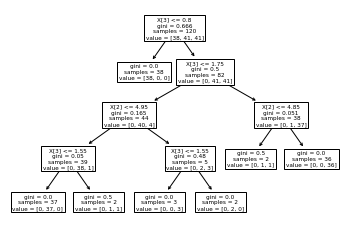

In [59]:
#For tree depth of 5
classifier = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2)
classifier = classifier.fit(X_train, y_train)

expected = y_test
predicted = classifier.predict(X_test)

tree.plot_tree(classifier)


In [60]:
#Look at main classification metrics for tree of depth 5
print("Expected: ", expected)
print("Predicted:", predicted)
print(metrics.classification_report(expected, predicted))

Expected:  [0 0 2 1 0 2 2 0 2 1 0 0 1 2 1 0 1 0 0 1 2 0 1 2 0 1 1 2 2 0]
Predicted: [0 0 2 1 0 2 2 0 2 1 0 0 1 1 1 0 1 0 0 1 2 0 1 2 0 1 1 2 1 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.82      1.00      0.90         9
           2       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



Based on the above, the tree with the max-depth of 2 indicated the highest recall for all three classses (0-1,1-1,2-0.89,macro avg:0.96 and weighted avg:0.97). 

After max-depth of 2, the recall becomes constant among all three classes (0-1, 1-1, 2-0.89/0.78, macro and weighted avg:0.93) meaning that the tree is a pure as it can possibly be based on the training set. Also, these data show after 2th depth, three classes might be splited mostly. 
That indicates that at max-depth of 2, the recall is the highest because it has not done enough splits within the tree to calculate the proper recall. 

Precision is the lowest at max-depth of 1. which is (0-1.0,1-0.50,2-0.0, macro avg:0.50, weighted avg:0.55) Because it has not predicted one of the classes (class 2). 

F1-score is based on both precision and recall, and since recall and precision were highest in the tre of max-depth of 2, it is also the highest in the tree of max-depth of 2. Also, after depth 2,f1 becomes comstant.

Micro-average will aggregate the contributions of all classes to compute the average metric. 
Macro-average will straight forward. Just take the average of the precision and recall of the system on different sets. compute the metric independently for each class and then take the average (hence treating all classes equally) 
In a multi-class classification setup, micro-average is preferable if suspect there might be class imbalance (i.e have many more examples of one class than of other classes).
Weighted-average is similar to macro-average, but each metric is given an additional weight to further balance it out.
